In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 df_original=pd.read_csv('../data_v3/감성점수와 일별뉴스 합친거.csv',encoding='utf-8')

In [4]:
df_original

,도축일,경락단가,경락단가_평균,datetime,new_content_x,day_sentiment
0,2018-01-02,3750.366093,3750.366093,2018-01-02,지난해 11월 양돈용 배합사료 생산량이 크게 증가했다.농림축산식품부에 따르면 지난...,0.000000
1,2018-01-03,3547.574932,3547.574932,2018-01-02,지난해 11월 양돈용 배합사료 생산량이 크게 증가했다.농림축산식품부에 따르면 지난...,0.000000
2,2018-01-04,3696.060897,3696.060897,2018-01-04,"\t\t\t\t\t종돈 4,409마리 수입…5년만에 최고\r\n종개협 신규 종돈장...",-0.104167
3,2018-01-05,3770.156364,3770.156364,2018-01-04,"\t\t\t\t\t종돈 4,409마리 수입…5년만에 최고\r\n종개협 신규 종돈장...",-0.104167
4,2018-01-08,3809.974684,3809.974684,2018-01-04,"\t\t\t\t\t종돈 4,409마리 수입…5년만에 최고\r\n종개협 신규 종돈장...",-0.104167
...,...,...,...,...,...,...
620,2021-12-27,4547.071429,4547.071429,2021-12-27,\n▲ 연암대가 최근 ICT 융복합 스마트 양돈실습장 구축을 완료했다.\n \n연암...,0.175000
621,2021-12-28,4373.212544,4373.212544,2021-12-28,범 양돈산업계를 아우르는 컨트롤타워 출현이 가시화되고 있다.대한한돈협회 손세희 회장...,-0.116270
622,2021-12-29,4278.649485,4278.649485,2021-12-28,범 양돈산업계를 아우르는 컨트롤타워 출현이 가시화되고 있다.대한한돈협회 손세희 회장...,-0.116270
623,2021-12-30,4322.080986,4322.080986,2021-12-28,범 양돈산업계를 아우르는 컨트롤타워 출현이 가시화되고 있다.대한한돈협회 손세희 회장...,-0.116270


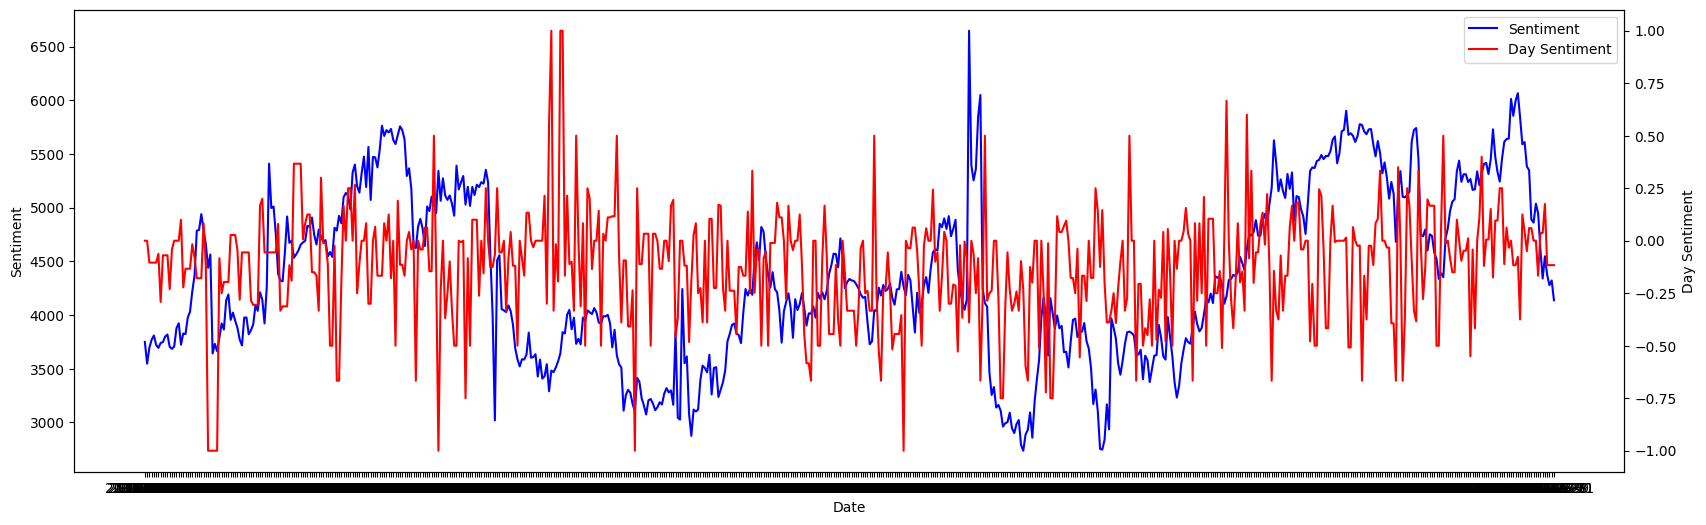

In [13]:
# Data
x = df_original['도축일']
y1 = df_original['경락단가_평균']
y2 = df_original['day_sentiment']

# Create the first y-axis
fig, ax1 = plt.subplots(figsize=(20,6))

# Plot the first line
ax1.plot(x, y1, color='blue', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.tick_params(axis='y')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second line
ax2.plot(x, y2, color='red', label='Day Sentiment')
ax2.set_ylabel('Day Sentiment')
ax2.tick_params(axis='y')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

# Display the plot
plt.show()

In [40]:
import networkx as nx 

g1 = nx.complete_graph(["n{}".format(i) for i in range(0, 5)])
g2 = nx.complete_graph(["n{}".format(i) for i in range(0, 5)])

for i in range(0, 3):
    r_n = np.random.choice(g2.nodes())
    print("node removed: {}".format(r_n))
    print("edge removed: {}".format([e for e in g2.edges() if r_n in e]))
    g2.remove_node(r_n)
    print(nx.similarity.graph_edit_distance(g1, g2))
    print("="*50)

node removed: n4
edge removed: [('n0', 'n4'), ('n1', 'n4'), ('n2', 'n4'), ('n3', 'n4')]
5.0
node removed: n1
edge removed: [('n0', 'n1'), ('n1', 'n2'), ('n1', 'n3')]
9.0
node removed: n3
edge removed: [('n0', 'n3'), ('n2', 'n3')]
12.0


In [ ]:
from IQA_pytorch import SSIM, utils
from PIL import Image
import torch
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
ref_path  = 'r0.png'
dist_path = 'r1.png' 
 
ref = utils.prepare_image(Image.open(ref_path).convert("RGB")).to(device)
dist = utils.prepare_image(Image.open(dist_path).convert("RGB")).to(device)
 
model = SSIM(channels=3)
 
score = model(dist, ref, as_loss=False)
print('score: %.4f' % score.item())
